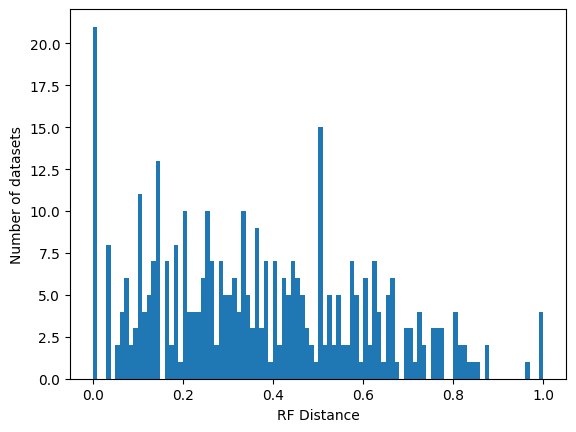

In [15]:
import os
from ete3 import Tree
import pandas as pd
import matplotlib.pyplot as plt

def rf_distance(t1, t2):
    rf, max_rf, common_leaves, parts_t1, parts_t2,discard_t1, discart_t2 = t1.robinson_foulds(t2, unrooted_trees = True)
    if max_rf == 0:
        print("?!")
        return 0
    return rf/max_rf

def resolve_multifurcation(newick_string_file):
    newick_string = open(newick_string_file).readline().strip()
    tree = ete3.Tree(newick_string)

    if not tree_is_bifurcating(tree):
        tree.resolve_polytomy(recursive=True)

    return tree.write(format=1)

def calculate_consensus_trees():
    d = "morph_parquets/bin/"
    bin_consensus_trees = {}
    with os.scandir(d) as it:
        for entry in it:
            if not entry.is_dir():
                continue
            tree = Tree(os.path.join(d, os.path.join(entry.name, "consense.raxml.consensusTreeMR")))
            tree.resolve_polytomy(recursive=True)
            name = entry.name.split(".")[0]
            bin_consensus_trees[name] = tree
    d = "morph_parquets/multi/"       
    multi_consensus_trees = {}
    with os.scandir(d) as it:
        for entry in it:
            if not entry.is_dir():
                continue
            tree = Tree(os.path.join(d, os.path.join(entry.name, "consense.raxml.consensusTreeMR")))
            tree.resolve_polytomy(recursive=True)
            name = entry.name.split(".")[0]
            multi_consensus_trees[name] = tree
    rfds = []
    for (name, bintree) in bin_consensus_trees.items():
        multitree = multi_consensus_trees[name]
        rfds.append(rf_distance(bintree, multitree))
    plt.xlabel("RF Distance")
    plt.ylabel("Number of datasets")
    plt.hist(rfds, bins=100)
    plt.show()
            
calculate_consensus_trees()